In [10]:
import pathlib
import glob

import pandas as pd
import numpy as np

### Load all provided stock prices

In [11]:
csv_directory = r'./universe'  # Replace with your directory path

prices = []
for file_path in glob.glob(f'{csv_directory}/*.csv'):
    df = pd.read_csv(file_path)
    df.set_index('Date', inplace=True)
    ticker = pathlib.Path(file_path).stem  # Extract the ticker from the filename
    df.columns = [ticker]  # Add a 'ticker' column with the ticker name
    prices.append(df)

# Concatenate the DataFrames in the list
merged_df = pd.concat(prices, axis=1,join='inner')

In [12]:
merged_df

,GRD,EEWF,PIT,PHG,LVP,IJM,VKM,NLHS,PTDE,YSMW,...,APQ,PAKH,OSD,MIH,HXE,ZPG,HBK,CNMO,BYJ,CMRX
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,97.843417,44.955194,24.533109,65.885681,75.341624,64.032964,116.597293,120.402303,56.021946,124.827287,...,41.153268,82.248237,122.645054,49.298044,315.225644,127.106864,128.510599,146.550074,241.405075,58.978466
2018-01-03,98.025637,45.002297,24.810185,65.535385,74.833526,65.002483,116.828920,122.894699,56.395367,124.125534,...,41.403621,82.172424,125.089711,50.765780,310.999651,124.220766,128.403133,148.606466,245.961251,59.247344
2018-01-04,96.752150,45.036689,24.851298,64.642176,74.569841,64.751834,116.255635,122.085828,54.981352,123.764176,...,41.100373,81.141951,124.416785,49.484395,319.148190,122.288091,125.976171,147.529965,246.798039,58.858756
2018-01-05,97.004171,45.250880,24.909552,65.328523,74.463089,64.521407,115.275362,123.182778,54.962658,127.154873,...,41.460241,81.617733,123.194535,50.299046,313.852284,124.763512,125.844478,149.273710,241.775219,59.594661
2018-01-08,98.343070,45.258272,24.979097,64.726307,74.347607,64.924960,114.905070,123.653605,55.527380,123.941602,...,41.915577,81.512581,122.874424,51.154988,314.514284,124.346704,129.537054,145.405581,249.787557,59.345982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,168.513071,56.775923,25.107955,99.733797,73.247142,89.486347,187.540096,407.378883,113.539802,157.323800,...,64.226280,99.525961,145.162954,83.702492,563.923667,280.455552,437.718344,236.093104,366.319597,74.223036
2022-12-27,169.792189,57.776392,25.402983,101.084254,72.927657,90.120686,189.236300,406.848212,110.351667,159.699225,...,63.712386,100.263858,144.880918,81.600978,566.722132,283.283271,445.407293,239.796610,368.145255,73.914338
2022-12-28,169.336113,56.706952,25.428842,99.568569,72.218675,88.711188,187.878233,405.458703,109.093333,158.106884,...,63.779943,99.796393,142.662355,81.333474,570.196344,273.408282,444.457218,237.649349,362.421878,72.331143


### Calculate daily returns

In [14]:
returns_df = merged_df.pct_change().dropna()

### Use PyPortfolioOpt to get an initial guess of the weights

In [62]:
from pprint import pprint
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
#https://pyportfolioopt.readthedocs.io/en/latest/MeanVariance.html#adding-objectives-and-constraints

mu = mean_historical_return(merged_df)
S = CovarianceShrinkage(merged_df).ledoit_wolf()

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe(risk_free_rate =0)

cleaned_weights = ef.clean_weights()

/Users/matus/anaconda3/envs/blackrock/lib/python3.10/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


### Define Sortino ratio evaluation function

In [ ]:
def calc_sortino_ratio(weights, **kwargs):
    weighted_returns = (returns_df * [float(w) for w in weights]).sum(axis=1)
    downside_deviation = np.std(weighted_returns[weighted_returns < 0], ddof=0)

    return -(weighted_returns.mean() / downside_deviation) * np.sqrt(252)

In [ ]:
-calc_sortino_ratio(np.array([cleaned_weights.get(company, 0.0) for company in returns_df.columns]))

### Minimise initial guess to optimum

In [18]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize, NonlinearConstraint

n_companies = len(returns_df.columns)

In [56]:
sortino_hist = []

def p_callback(values):
    c_score = -calc_sortino_ratio(values)
    sortino_hist.append((c_score, values))
    print(c_score)

optimal_weights = minimize(
    calc_sortino_ratio,
    x0=[cleaned_weights.get(company, 0.0) for company in returns_df.columns],
    bounds=[(0.0, 1.0) for _ in range(n_companies)],
    constraints=[
        NonlinearConstraint(
            fun=lambda x: x.sum(),
            lb=0.9999, ub=1.0001
        ),
        NonlinearConstraint(
            fun=lambda x: np.abs(x - x.round(5)).sum(),
            lb=0.0, ub=0.00001
        )
    ],
    method='SLSQP',
    callback=p_callback
)

2.0392606542857767
2.358101316185485
2.461155027772156
2.4496080095000057
2.402688560252506
2.394818184474381
2.4791825024286442
2.4881518606156914
2.4956872757104636
2.4946411498842123
2.4265651248359044
2.446392847304671
2.3889615754308133
2.3351645141902315
2.180415176581564
2.1754197982403523
2.375924149559034
2.492883277692231
2.493920618320114
2.4951834177546828
2.49497386475183
2.4948778736804393
2.4959821845713672
2.4746323441110216
2.4970264507071445
2.493739850194064
2.465285803272709
2.3626140444783084
2.317179687904605
2.2383847789404023
2.2225548280875285
2.4253348084720536
1.8873602280055632
2.414040792897245
2.1500821647220256
2.2549682222014016
2.0988844057204985
2.455676439491716
2.462711257314248
2.19080585502729
2.1568279461765134
2.3985293698231605
2.3305021528243075
2.3810063888266733
2.4728020309992575
2.494962798166918
2.434974077372639
2.44576009782828
2.465351527435879
2.4612232911882312
2.451980842712761
2.1606645618931513
2.4678464186719618
2.494609991169539


### Clean and output

In [63]:
max_score, max_values = sorted(sortino_hist, reverse=True)[0]

In [64]:
max_score

2.4979726375634645

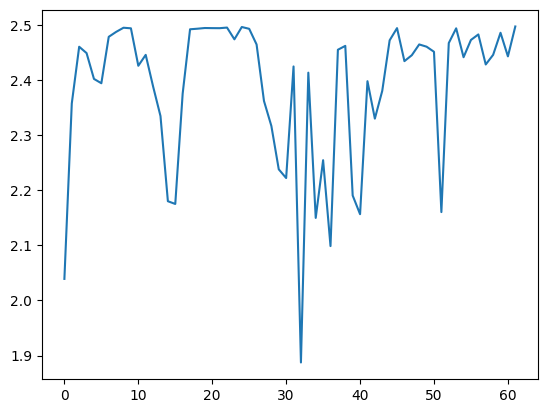

In [65]:
plt.plot([score for score, _ in sortino_hist])

In [66]:
from decimal import Decimal

discretized_values = [Decimal(weight).quantize(Decimal("0.00001")) for weight in max_values]

# Get raw values
m_values_dict = {
    ticker: weight for ticker, weight in zip(returns_df.columns, discretized_values)
    if weight != Decimal('0.0')
}

In [68]:
print(sum(m_values_dict.values()), -calc_sortino_ratio(discretized_values))

1.00000 2.4979730684691526


### Write results to csv

In [72]:
output_df = pd.DataFrame.from_records([
    {'ticker': ticker, 'weight': weight * Decimal('100')} for ticker, weight in m_values_dict.items()
])
output_df.to_csv('./portfolio.csv', index=False, header=False)